In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Loading Dataset
data = pd.read_csv('my_movies.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# EDA

In [9]:
data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


V1       V2             V3          V4     V5  Sixth Sense  \
0  Sixth Sense    LOTR1  Harry Potter1  Green Mile  LOTR2            1   
1    Gladiator  Patriot     Braveheart         NaN    NaN            0   
2        LOTR1    LOTR2            NaN         NaN    NaN            0   
3    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   
4    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   

   Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  \
0          0      1              1        0      1              0     0   
1          1      0              0        1      0              0     0   
2          0      1              0        0      1              0     0   
3          1      0              0        1      0              0     0   
4          1      0              0        1      0              0     0   

   Braveheart  Green Mile  
0           0           1  
1           1           0  
2           0           0  
3           0           0  
4           0           0

In [10]:
# checking the random entries in the data

data.sample(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


V1             V2             V3          V4     V5  \
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
4            1          1      0              0        1      0   
1            0          1      0              0        1      0   
8            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
9            1          1      0              0        0      0   
0            1          0      1              1        0      1   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
4              0     0           0           0  
1              0     0           1           0  
8              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
9              0     1           0           1  
0              0     0           0           1  
2              0     0           0           0  
3              0     0           0           0

In [11]:
data.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10, 15)

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
data.isna().sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [14]:
data.columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

# Data Preprocessing


In [15]:
data=data.drop(['V1', 'V2', 'V3', 'V4', 'V5'], axis = 1)
data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 10 artists>

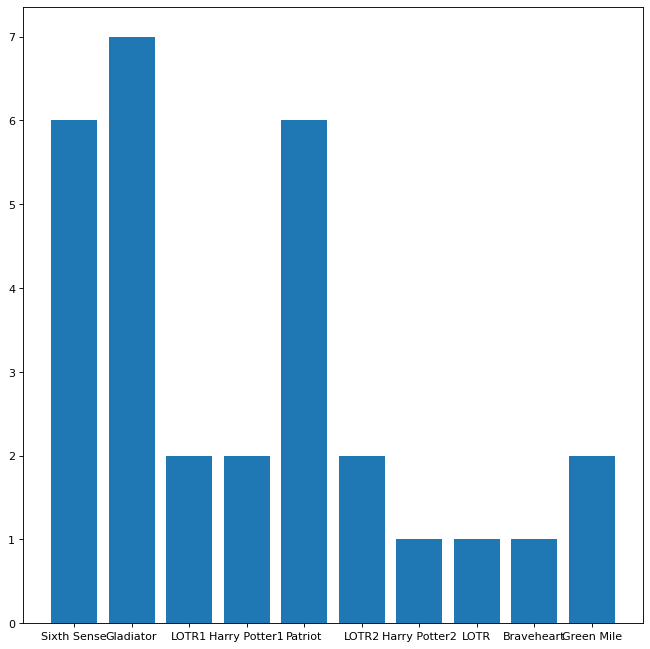

In [16]:
movie_count = []
col_names = data.columns
for col_name in col_names:
    movie_count.append(data[col_name].value_counts()[1])

plt.figure(figsize=(10, 10), dpi=80)
plt.bar(col_names, movie_count)

# Apriori Algorithm for min_support = 0.1


In [17]:
frequent_itemsets1 = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Gladiator, Patriot)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Gladiator, Green Mile)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Gladiator, Patriot, Sixth Sense)
31      0.1                     (Gladiator, LOTR, Sixth Sense)
32      0.1               (Gladiator, Green Mile, Sixth Sense)
33      0.1                (Harry Potter1, Sixth Sense, LOTR1)
34      0.1                        (LOTR2, Sixth Sense, LOTR1)
35      0.1                   (Green Mile, Sixth Sense, LOTR1)
36      0.1                (LOTR2, Harry Potter1, Sixth Sense)
37      0.1           (Green Mile, Harry Potter1, Sixth Sense)
38      0.1                   (LOTR2, Green Mile, Sixth Sense)
39      0.1                    (Green Mile, LOTR, Sixth Sense)
40      0.1                   (Gladiator, Patriot, Braveheart)
41      0.1                      (Gladiator, Green Mile, LOTR)
42      0.1                      (LOTR2, Harry Potter1, LOTR1)
43      0.1                 (Green Mile, Harry Potter1, LOTR1)
44      0.1                         (LOTR2, Green Mile, LOTR1)
45      0.1                 (LOTR2, Green Mile, Harry Potter1)
46      0.1         (Gladiator, Green Mile, LOTR, Sixth Sense)
47      0.1         (LOTR2, Harry Potter1, Sixth Sense, LOTR1)
48      0.1    (Green Mile, Harry Potter1, Sixth Sense, LOTR1)
49      0.1            (LOTR2, Green Mile, Sixth Sense, LOTR1)
50      0.1    (LOTR2, Green Mile, Harry Potter1, Sixth Sense)
51      0.1          (LOTR2, Green Mile, Harry Potter1, LOTR1)
52      0.1  (Sixth Sense, Harry Potter1, LOTR1, Green Mile...

In [18]:
frequent_itemsets1 = apriori(data, min_support = 0.1, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets  length
0       0.6                                      (Sixth Sense)       1
1       0.7                                        (Gladiator)       1
2       0.2                                            (LOTR1)       1
3       0.2                                    (Harry Potter1)       1
4       0.6                                          (Patriot)       1
5       0.2                                            (LOTR2)       1
6       0.1                                    (Harry Potter2)       1
7       0.1                                             (LOTR)       1
8       0.1                                       (Braveheart)       1
9       0.2                                       (Green Mile)       1
10      0.5                           (Gladiator, Sixth Sense)       2
11      0.1                               (Sixth Sense, LOTR1)       2
12      0.1                       (Harry Potter1, Sixth Sense)       2
13      0.4                             (Patriot, Sixth Sense)       2
14      0.1                               (LOTR2, Sixth Sense)       2
15      0.1                                (LOTR, Sixth Sense)       2
16      0.2                          (Green Mile, Sixth Sense)       2
17      0.6                               (Gladiator, Patriot)       2
18      0.1                                  (Gladiator, LOTR)       2
19      0.1                            (Gladiator, Braveheart)       2
20      0.1                            (Gladiator, Green Mile)       2
21      0.1                             (Harry Potter1, LOTR1)       2
22      0.2                                     (LOTR2, LOTR1)       2
23      0.1                                (Green Mile, LOTR1)       2
24      0.1                             (LOTR2, Harry Potter1)       2
25      0.1                     (Harry Potter1, Harry Potter2)       2
26      0.1                        (Green Mile, Harry Potter1)       2
27      0.1                              (Patriot, Braveheart)       2
28      0.1                                (LOTR2, Green Mile)       2
29      0.1                                 (Green Mile, LOTR)       2
30      0.4                  (Gladiator, Patriot, Sixth Sense)       3
31      0.1                     (Gladiator, LOTR, Sixth Sense)       3
32      0.1               (Gladiator, Green Mile, Sixth Sense)       3
33      0.1                (Harry Potter1, Sixth Sense, LOTR1)       3
34      0.1                        (LOTR2, Sixth Sense, LOTR1)       3
35      0.1                   (Green Mile, Sixth Sense, LOTR1)       3
36      0.1                (LOTR2, Harry Potter1, Sixth Sense)       3
37      0.1           (Green Mile, Harry Potter1, Sixth Sense)       3
38      0.1                   (LOTR2, Green Mile, Sixth Sense)       3
39      0.1                    (Green Mile, LOTR, Sixth Sense)       3
40      0.1                   (Gladiator, Patriot, Braveheart)       3
41      0.1                      (Gladiator, Green Mile, LOTR)       3
42      0.1                      (LOTR2, Harry Potter1, LOTR1)       3
43      0.1                 (Green Mile, Harry Potter1, LOTR1)       3
44      0.1                         (LOTR2, Green Mile, LOTR1)       3
45      0.1                 (LOTR2, Green Mile, Harry Potter1)       3
46      0.1         (Gladiator, Green Mile, LOTR, Sixth Sense)       4
47      0.1         (LOTR2, Harry Potter1, Sixth Sense, LOTR1)       4
48      0.1    (Green Mile, Harry Potter1, Sixth Sense, LOTR1)       4
49      0.1            (LOTR2, Green Mile, Sixth Sense, LOTR1)       4
50      0.1    (LOTR2, Green Mile, Harry Potter1, Sixth Sense)       4
51      0.1          (LOTR2, Green Mile, Harry Potter1, LOTR1)       4
52      0.1  (Sixth Sense, Harry Potter1, LOTR1, Green Mile...       5

# Rules when min_support = 0.1 and min_threshold for lift is 0.5

In [19]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                                      consequents  \
0        (Gladiator)                                    (Sixth Sense)   
1      (Sixth Sense)                                      (Gladiator)   
2          (Patriot)                                    (Sixth Sense)   
3      (Sixth Sense)                                        (Patriot)   
4             (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
233    (Sixth Sense)        (LOTR2, Green Mile, Harry Potter1, LOTR1)   
234  (Harry Potter1)          (LOTR2, Green Mile, Sixth Sense, LOTR1)   
235          (LOTR1)  (LOTR2, Green Mile, Harry Potter1, Sixth Sense)   
236     (Green Mile)       (LOTR2, Harry Potter1, Sixth Sense, LOTR1)   
237          (LOTR2)  (Green Mile, Harry Potter1, Sixth Sense, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.7                 0.6      0.5    0.714286  1.190476   
1                   0.6                 0.7      0.5    0.833333  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.6                 0.1      0.1    0.166667  1.666667   
234                 0.2                 0.1      0.1    0.500000  5.000000   
235                 0.2                 0.1      0.1    0.500000  5.000000   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  zhangs_metric  
0        0.08        1.40       0.533333  
1        0.08        1.80       0.400000  
2        0.04        1.20       0.250000  
3        0.04        1.20       0.250000  
4        0.04         inf       0.444444  
..        ...         ...            ...  
233      0.04        1.08       1.000000  
234      0.08        1.80       1.000000  
235      0.08        1.80       1.000000  
236      0.08        1.80       1.000000  
237      0.08        1.80       1.000000  

[238 rows x 10 columns]

In [20]:
rules1 = association_rules(frequent_itemsets1, metric ="lift", min_threshold = 1)
rules1 = rules1.sort_values(['confidence', 'lift'], ascending =[False, False])
rules1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                      consequents  \
94                (Gladiator, Green Mile)                           (LOTR)   
99                                 (LOTR)          (Gladiator, Green Mile)   
125  (Gladiator, Green Mile, Sixth Sense)                           (LOTR)   
128               (Gladiator, Green Mile)              (LOTR, Sixth Sense)   
133                   (LOTR, Sixth Sense)          (Gladiator, Green Mile)   
..                                    ...                              ...   
12                            (Gladiator)                     (Braveheart)   
41                            (Gladiator)              (LOTR, Sixth Sense)   
91                            (Gladiator)            (Patriot, Braveheart)   
97                            (Gladiator)               (Green Mile, LOTR)   
134                           (Gladiator)  (Green Mile, LOTR, Sixth Sense)   

     antecedent support  consequent support  support  confidence       lift  \
94                  0.1                 0.1      0.1    1.000000  10.000000   
99                  0.1                 0.1      0.1    1.000000  10.000000   
125                 0.1                 0.1      0.1    1.000000  10.000000   
128                 0.1                 0.1      0.1    1.000000  10.000000   
133                 0.1                 0.1      0.1    1.000000  10.000000   
..                  ...                 ...      ...         ...        ...   
12                  0.7                 0.1      0.1    0.142857   1.428571   
41                  0.7                 0.1      0.1    0.142857   1.428571   
91                  0.7                 0.1      0.1    0.142857   1.428571   
97                  0.7                 0.1      0.1    0.142857   1.428571   
134                 0.7                 0.1      0.1    0.142857   1.428571   

     leverage  conviction  zhangs_metric  
94       0.09         inf            1.0  
99       0.09         inf            1.0  
125      0.09         inf            1.0  
128      0.09         inf            1.0  
133      0.09         inf            1.0  
..        ...         ...            ...  
12       0.03        1.05            1.0  
41       0.03        1.05            1.0  
91       0.03        1.05            1.0  
97       0.03        1.05            1.0  
134      0.03        1.05            1.0  

[238 rows x 10 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


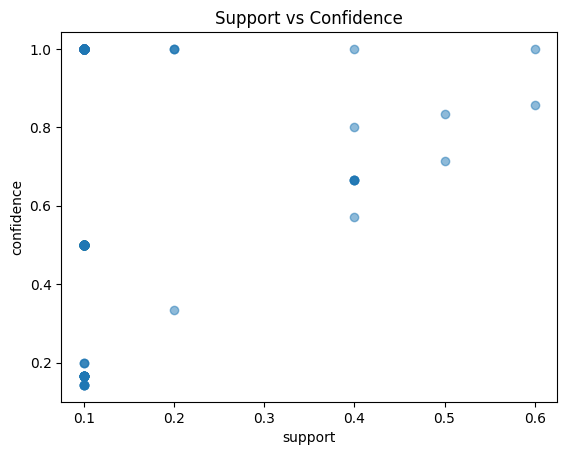

In [21]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Rules when min_support = 0.1 and min_threshold for confidence is 0.5


In [22]:
rules2 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.5)
rules2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                                      consequents  \
0            (Gladiator)                                    (Sixth Sense)   
1          (Sixth Sense)                                      (Gladiator)   
2                (LOTR1)                                    (Sixth Sense)   
3        (Harry Potter1)                                    (Sixth Sense)   
4              (Patriot)                                    (Sixth Sense)   
..                   ...                                              ...   
211  (LOTR2, Green Mile)              (Harry Potter1, Sixth Sense, LOTR1)   
212      (Harry Potter1)          (LOTR2, Green Mile, Sixth Sense, LOTR1)   
213              (LOTR1)  (LOTR2, Green Mile, Harry Potter1, Sixth Sense)   
214         (Green Mile)       (LOTR2, Harry Potter1, Sixth Sense, LOTR1)   
215              (LOTR2)  (Green Mile, Harry Potter1, Sixth Sense, LOTR1)   

     antecedent support  consequent support  support  confidence       lift  \
0                   0.7                 0.6      0.5    0.714286   1.190476   
1                   0.6                 0.7      0.5    0.833333   1.190476   
2                   0.2                 0.6      0.1    0.500000   0.833333   
3                   0.2                 0.6      0.1    0.500000   0.833333   
4                   0.6                 0.6      0.4    0.666667   1.111111   
..                  ...                 ...      ...         ...        ...   
211                 0.1                 0.1      0.1    1.000000  10.000000   
212                 0.2                 0.1      0.1    0.500000   5.000000   
213                 0.2                 0.1      0.1    0.500000   5.000000   
214                 0.2                 0.1      0.1    0.500000   5.000000   
215                 0.2                 0.1      0.1    0.500000   5.000000   

     leverage  conviction  zhangs_metric  
0        0.08         1.4       0.533333  
1        0.08         1.8       0.400000  
2       -0.02         0.8      -0.200000  
3       -0.02         0.8      -0.200000  
4        0.04         1.2       0.250000  
..        ...         ...            ...  
211      0.09         inf       1.000000  
212      0.08         1.8       1.000000  
213      0.08         1.8       1.000000  
214      0.08         1.8       1.000000  
215      0.08         1.8       1.000000  

[216 rows x 10 columns]

In [23]:
rules2 = rules2.sort_values(['confidence', 'lift'], ascending =[False, False])
rules2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents              consequents  \
81                (Gladiator, Green Mile)                   (LOTR)   
85                                 (LOTR)  (Gladiator, Green Mile)   
111  (Gladiator, Green Mile, Sixth Sense)                   (LOTR)   
114               (Gladiator, Green Mile)      (LOTR, Sixth Sense)   
118                   (LOTR, Sixth Sense)  (Gladiator, Green Mile)   
..                                    ...                      ...   
3                         (Harry Potter1)            (Sixth Sense)   
6                                 (LOTR2)            (Sixth Sense)   
49                         (LOTR2, LOTR1)            (Sixth Sense)   
13                           (Green Mile)              (Gladiator)   
41              (Green Mile, Sixth Sense)              (Gladiator)   

     antecedent support  consequent support  support  confidence       lift  \
81                  0.1                 0.1      0.1         1.0  10.000000   
85                  0.1                 0.1      0.1         1.0  10.000000   
111                 0.1                 0.1      0.1         1.0  10.000000   
114                 0.1                 0.1      0.1         1.0  10.000000   
118                 0.1                 0.1      0.1         1.0  10.000000   
..                  ...                 ...      ...         ...        ...   
3                   0.2                 0.6      0.1         0.5   0.833333   
6                   0.2                 0.6      0.1         0.5   0.833333   
49                  0.2                 0.6      0.1         0.5   0.833333   
13                  0.2                 0.7      0.1         0.5   0.714286   
41                  0.2                 0.7      0.1         0.5   0.714286   

     leverage  conviction  zhangs_metric  
81       0.09         inf       1.000000  
85       0.09         inf       1.000000  
111      0.09         inf       1.000000  
114      0.09         inf       1.000000  
118      0.09         inf       1.000000  
..        ...         ...            ...  
3       -0.02         0.8      -0.200000  
6       -0.02         0.8      -0.200000  
49      -0.02         0.8      -0.200000  
13      -0.04         0.6      -0.333333  
41      -0.04         0.6      -0.333333  

[216 rows x 10 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


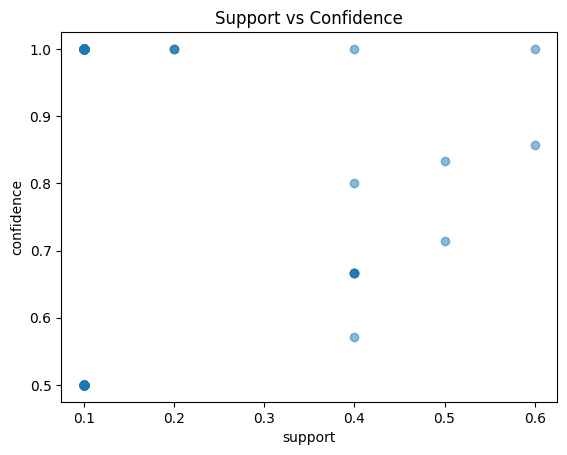

In [24]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Apriori Algorithm for min_support = 0.2


In [26]:
frequent_itemsets2 = apriori(data, min_support=0.2, use_colnames=True)
frequent_itemsets2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Gladiator, Sixth Sense)
8       0.4             (Patriot, Sixth Sense)
9       0.2          (Green Mile, Sixth Sense)
10      0.6               (Gladiator, Patriot)
11      0.2                     (LOTR2, LOTR1)
12      0.4  (Gladiator, Patriot, Sixth Sense)

In [27]:
frequent_itemsets2 = apriori(data, min_support = 0.2, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                           itemsets  length
0       0.6                      (Sixth Sense)       1
1       0.7                        (Gladiator)       1
2       0.2                            (LOTR1)       1
3       0.2                    (Harry Potter1)       1
4       0.6                          (Patriot)       1
5       0.2                            (LOTR2)       1
6       0.2                       (Green Mile)       1
7       0.5           (Gladiator, Sixth Sense)       2
8       0.4             (Patriot, Sixth Sense)       2
9       0.2          (Green Mile, Sixth Sense)       2
10      0.6               (Gladiator, Patriot)       2
11      0.2                     (LOTR2, LOTR1)       2
12      0.4  (Gladiator, Patriot, Sixth Sense)       3

# Rules when min_support = 0.2 and min_threshold for lift is 0.5

In [28]:
rules3 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.1)
rules3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents               consequents  antecedent support  \
0                (Gladiator)             (Sixth Sense)                 0.7   
1              (Sixth Sense)               (Gladiator)                 0.6   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5              (Sixth Sense)              (Green Mile)                 0.6   
6                (Gladiator)                 (Patriot)                 0.7   
7                  (Patriot)               (Gladiator)                 0.6   
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
10      (Gladiator, Patriot)             (Sixth Sense)                 0.6   
11  (Gladiator, Sixth Sense)                 (Patriot)                 0.5   
12    (Patriot, Sixth Sense)               (Gladiator)                 0.4   
13               (Gladiator)    (Patriot, Sixth Sense)                 0.7   
14                 (Patriot)  (Gladiator, Sixth Sense)                 0.6   
15             (Sixth Sense)      (Gladiator, Patriot)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
0                  0.6      0.5    0.714286  1.190476      0.08         1.4   
1                  0.7      0.5    0.833333  1.190476      0.08         1.8   
2                  0.6      0.4    0.666667  1.111111      0.04         1.2   
3                  0.6      0.4    0.666667  1.111111      0.04         1.2   
4                  0.6      0.2    1.000000  1.666667      0.08         inf   
5                  0.2      0.2    0.333333  1.666667      0.08         1.2   
6                  0.6      0.6    0.857143  1.428571      0.18         2.8   
7                  0.7      0.6    1.000000  1.428571      0.18         inf   
8                  0.2      0.2    1.000000  5.000000      0.16         inf   
9                  0.2      0.2    1.000000  5.000000      0.16         inf   
10                 0.6      0.4    0.666667  1.111111      0.04         1.2   
11                 0.6      0.4    0.800000  1.333333      0.10         2.0   
12                 0.7      0.4    1.000000  1.428571      0.12         inf   
13                 0.4      0.4    0.571429  1.428571      0.12         1.4   
14                 0.5      0.4    0.666667  1.333333      0.10         1.5   
15                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    zhangs_metric  
0        0.533333  
1        0.400000  
2        0.250000  
3        0.250000  
4        0.500000  
5        1.000000  
6        1.000000  
7        0.750000  
8        1.000000  
9        1.000000  
10       0.250000  
11       0.500000  
12       0.500000  
13       1.000000  
14       0.625000  
15       0.250000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


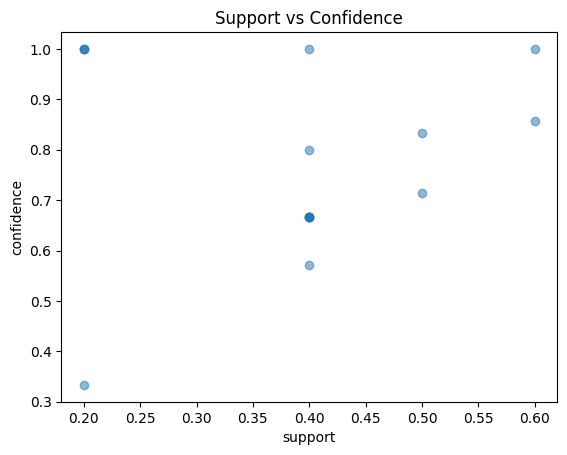

In [29]:
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Rules when min_support = 0.1 and min_threshold for confidence is 0.5


In [30]:
rules4 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)
rules4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents               consequents  antecedent support  \
0                (Gladiator)             (Sixth Sense)                 0.7   
1              (Sixth Sense)               (Gladiator)                 0.6   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5                (Gladiator)                 (Patriot)                 0.7   
6                  (Patriot)               (Gladiator)                 0.6   
7                    (LOTR2)                   (LOTR1)                 0.2   
8                    (LOTR1)                   (LOTR2)                 0.2   
9       (Gladiator, Patriot)             (Sixth Sense)                 0.6   
10  (Gladiator, Sixth Sense)                 (Patriot)                 0.5   
11    (Patriot, Sixth Sense)               (Gladiator)                 0.4   
12               (Gladiator)    (Patriot, Sixth Sense)                 0.7   
13                 (Patriot)  (Gladiator, Sixth Sense)                 0.6   
14             (Sixth Sense)      (Gladiator, Patriot)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
0                  0.6      0.5    0.714286  1.190476      0.08         1.4   
1                  0.7      0.5    0.833333  1.190476      0.08         1.8   
2                  0.6      0.4    0.666667  1.111111      0.04         1.2   
3                  0.6      0.4    0.666667  1.111111      0.04         1.2   
4                  0.6      0.2    1.000000  1.666667      0.08         inf   
5                  0.6      0.6    0.857143  1.428571      0.18         2.8   
6                  0.7      0.6    1.000000  1.428571      0.18         inf   
7                  0.2      0.2    1.000000  5.000000      0.16         inf   
8                  0.2      0.2    1.000000  5.000000      0.16         inf   
9                  0.6      0.4    0.666667  1.111111      0.04         1.2   
10                 0.6      0.4    0.800000  1.333333      0.10         2.0   
11                 0.7      0.4    1.000000  1.428571      0.12         inf   
12                 0.4      0.4    0.571429  1.428571      0.12         1.4   
13                 0.5      0.4    0.666667  1.333333      0.10         1.5   
14                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    zhangs_metric  
0        0.533333  
1        0.400000  
2        0.250000  
3        0.250000  
4        0.500000  
5        1.000000  
6        0.750000  
7        1.000000  
8        1.000000  
9        0.250000  
10       0.500000  
11       0.500000  
12       1.000000  
13       0.625000  
14       0.250000

In [31]:
rules4 = rules4.sort_values(['confidence', 'lift'], ascending =[False, False])
rules4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents               consequents  antecedent support  \
7                    (LOTR2)                   (LOTR1)                 0.2   
8                    (LOTR1)                   (LOTR2)                 0.2   
4               (Green Mile)             (Sixth Sense)                 0.2   
6                  (Patriot)               (Gladiator)                 0.6   
11    (Patriot, Sixth Sense)               (Gladiator)                 0.4   
5                (Gladiator)                 (Patriot)                 0.7   
1              (Sixth Sense)               (Gladiator)                 0.6   
10  (Gladiator, Sixth Sense)                 (Patriot)                 0.5   
0                (Gladiator)             (Sixth Sense)                 0.7   
13                 (Patriot)  (Gladiator, Sixth Sense)                 0.6   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
9       (Gladiator, Patriot)             (Sixth Sense)                 0.6   
14             (Sixth Sense)      (Gladiator, Patriot)                 0.6   
12               (Gladiator)    (Patriot, Sixth Sense)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  \
7                  0.2      0.2    1.000000  5.000000      0.16         inf   
8                  0.2      0.2    1.000000  5.000000      0.16         inf   
4                  0.6      0.2    1.000000  1.666667      0.08         inf   
6                  0.7      0.6    1.000000  1.428571      0.18         inf   
11                 0.7      0.4    1.000000  1.428571      0.12         inf   
5                  0.6      0.6    0.857143  1.428571      0.18         2.8   
1                  0.7      0.5    0.833333  1.190476      0.08         1.8   
10                 0.6      0.4    0.800000  1.333333      0.10         2.0   
0                  0.6      0.5    0.714286  1.190476      0.08         1.4   
13                 0.5      0.4    0.666667  1.333333      0.10         1.5   
2                  0.6      0.4    0.666667  1.111111      0.04         1.2   
3                  0.6      0.4    0.666667  1.111111      0.04         1.2   
9                  0.6      0.4    0.666667  1.111111      0.04         1.2   
14                 0.6      0.4    0.666667  1.111111      0.04         1.2   
12                 0.4      0.4    0.571429  1.428571      0.12         1.4   

    zhangs_metric  
7        1.000000  
8        1.000000  
4        0.500000  
6        0.750000  
11       0.500000  
5        1.000000  
1        0.400000  
10       0.500000  
0        0.533333  
13       0.625000  
2        0.250000  
3        0.250000  
9        0.250000  
14       0.250000  
12       1.000000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


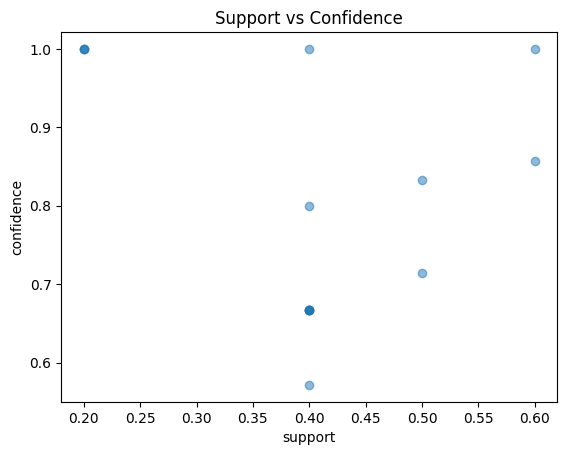

In [32]:
  plt.scatter(rules4['support'], rules4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()